In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer

# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
# from sklearn.linear_model import LinearRegression, SGDRegressor
# from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from sklearn import metrics
from scipy.stats import spearmanr
from sklearn.metrics import r2_score

## 4. Modeling

In [7]:
df = pd.read_csv("data/train_feature_engineered.csv")

In [ ]:
# check if there is missing values
# get a general info
# look at the correlations 

In [8]:
df.head()

,seq_id,protein_sequence,pH,tm,protein_sequence_length,L,A,E,S,G,...,instability_index,isoelectric_point,molecular_weight,molar_extinction_coefficient_reduced cysteins,molar_extinction_coefficient_disulfied bridges,secondary_structure_fraction_helix,secondary_structure_fraction_turn,secondary_structure_fraction_sheet,flexibility,charge_at_pH
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341,37,45,30,11,38,...,28.389736,6.109589,36320.7244,26470,26470,0.316716,0.211144,0.351906,"[0.9816666666666666, 0.9981785714285716, 0.989...",-1.872851
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286,23,28,52,14,18,...,65.108392,5.144349,32837.9931,20970,20970,0.213287,0.160839,0.367133,"[1.0370119047619046, 1.018095238095238, 1.0032...",-12.720355
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497,18,50,32,33,65,...,35.089336,9.032101,53428.8034,40340,40840,0.209256,0.267606,0.213280,"[0.987547619047619, 1.0112976190476188, 0.9999...",11.730622
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265,28,20,29,16,16,...,50.502264,4.683840,29475.5996,22460,22710,0.267925,0.215094,0.298113,"[0.9806190476190478, 1.0057738095238096, 0.990...",-20.561692
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,1451,104,86,78,148,84,...,45.668808,5.917928,158761.9814,158030,158905,0.271537,0.292901,0.206065,"[1.0195714285714286, 1.0309166666666667, 1.038...",-21.664651


In [12]:
# Checking if there is missing data 
pd.isnull(df).sum()

seq_id                                            0
protein_sequence                                  0
pH                                                0
tm                                                0
protein_sequence_length                           0
L                                                 0
A                                                 0
E                                                 0
S                                                 0
G                                                 0
V                                                 0
K                                                 0
D                                                 0
T                                                 0
R                                                 0
I                                                 0
P                                                 0
Q                                                 0
N                                                 0
F           

In [16]:
# drop the sequence id column 
df_ = df.drop(columns='seq_id')

In [17]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,31017.0,6.854615,0.851209,1.990000,7.000000,7.000000,7.000000,1.100000e+01
tm,31017.0,49.174952,13.980854,-1.000000,42.100000,48.100000,53.800000,1.300000e+02
protein_sequence_length,31017.0,449.703969,644.148182,5.000000,197.000000,337.000000,527.000000,3.276700e+04
L,31017.0,42.208370,52.513179,0.000000,17.000000,31.000000,50.000000,2.016000e+03
A,31017.0,34.398749,44.000154,0.000000,15.000000,26.000000,43.000000,1.989000e+03
E,31017.0,32.802431,57.979077,0.000000,13.000000,23.000000,39.000000,3.027000e+03
S,31017.0,32.308154,50.662600,0.000000,11.000000,21.000000,37.000000,2.268000e+03
G,31017.0,30.010672,40.799149,0.000000,13.000000,23.000000,38.000000,2.004000e+03
V,31017.0,29.368346,53.359945,0.000000,13.000000,22.000000,35.000000,3.091000e+03
K,31017.0,28.395428,50.470678,0.000000,12.000000,20.000000,34.000000,2.811000e+03


In [21]:
# correlations are pretty bad, a linear model may not help 
df_.corr()['tm']

pH                                                0.069487
tm                                                1.000000
protein_sequence_length                          -0.060868
L                                                -0.024126
A                                                -0.028019
E                                                -0.048382
S                                                -0.090518
G                                                -0.022534
V                                                -0.039362
K                                                -0.087556
D                                                -0.082108
T                                                -0.082778
R                                                -0.013531
I                                                -0.062575
P                                                -0.031237
Q                                                -0.094827
N                                                -0.1004

In [24]:
df_features = df_.drop(columns=['protein_sequence', 'tm', 'flexibility'])
df_target = df_['tm']
df_features.shape, df_target.shape

((31017, 33), (31017,))

<br><Br/>

### Feature Scaling   

Here we normalize the data (i.e. subtracting the mean from the data)

<p><p/>

**Feature Scaling:**   
* Standard Scaler:  

    $X = \frac{X - X.mean()}{X.std()}$  



* MinMax Scaler:   
This scaler works better for cases where the distribution is not Gaussian or the standard deviation is very small. Very sensitive to outliers.  

    $X = \frac{X - X.min()}{X.max() - X.min()}$  

In [26]:
scaler = StandardScaler()
df_features_std = scaler.fit_transform(df_features)

df_features_std = pd.DataFrame(df_features_std, columns = df_features.columns)
df_features_std

,pH,protein_sequence_length,L,A,E,S,G,V,K,D,...,gravy,instability_index,isoelectric_point,molecular_weight,molar_extinction_coefficient_reduced cysteins,molar_extinction_coefficient_disulfied bridges,secondary_structure_fraction_helix,secondary_structure_fraction_turn,secondary_structure_fraction_sheet,charge_at_pH
0,0.170801,-0.168759,-0.099184,0.240941,-0.048336,-0.420596,0.195824,0.143024,-0.245601,-0.338610,...,1.530957,-1.000256,-0.411040,-0.193092,-0.281242,-0.284063,0.480819,-0.333198,1.772787,0.098257
1,0.170801,-0.254144,-0.365788,-0.145428,0.331117,-0.361380,-0.294390,-0.306758,-0.186159,-0.423229,...,-2.430921,2.215474,-0.966262,-0.241673,-0.354922,-0.357132,-1.886427,-1.490716,2.091524,-0.412118
2,0.170801,0.073425,-0.461004,0.354578,-0.013840,0.013656,0.857613,0.011838,0.210117,0.056277,...,-1.217496,-0.413521,1.270037,0.045555,-0.095433,-0.093153,-1.978692,0.966004,-1.129052,0.738300
3,0.170801,-0.286746,-0.270572,-0.327248,-0.065584,-0.321902,-0.343412,-0.288017,-0.225787,-0.169373,...,-0.569121,0.936305,-1.231155,-0.288577,-0.334961,-0.334016,-0.635894,-0.242293,0.646750,-0.781053
4,0.170801,1.554475,1.176707,1.172771,0.779562,2.283612,1.323317,1.773487,0.784717,1.494795,...,-0.226496,0.513003,-0.521287,1.514884,1.481193,1.475381,-0.553216,1.548066,-1.280080,-0.832947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31012,0.170801,0.154153,0.072205,-0.031790,-0.031088,0.013656,0.514463,0.236729,0.071420,0.366546,...,-0.666787,0.770062,0.944594,0.165084,0.681292,0.680453,-0.181083,0.382764,-0.903731,0.470003
31013,0.170801,0.029956,0.091248,0.059120,-0.065584,0.092611,-0.073794,0.086802,-0.166345,-0.112960,...,0.740160,-0.396377,-0.167922,0.034519,0.012006,0.010074,0.649690,-0.187306,0.074776,0.031074
31014,0.170801,-0.499433,-0.689521,-0.486341,-0.445037,-0.440335,-0.465965,-0.419204,-0.404111,-0.507848,...,-0.008544,0.384231,-0.893287,-0.501606,-0.261281,-0.264268,-0.688525,0.560895,-0.196856,0.042404
31015,0.170801,0.222462,0.053161,0.286396,0.055151,0.368954,0.538974,0.349175,0.130862,0.253721,...,0.614743,-0.279610,-0.653472,0.198148,-0.055512,-0.056884,-0.168077,0.978028,-0.157420,-0.248575


<br><Br/>

### Train Test Split

In [28]:
seed = 7
np.random.seed(seed)
# train_test_split shuffles the data by default
# train, test, val: 60%, 20%, 20% 
X_train, X_test, y_train, y_test = train_test_split(df_features_std, df_target, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [29]:
print (X_train.shape)
print (y_train.shape)
print (X_val.shape)
print (y_val.shape)
print (X_test.shape)
print (y_test.shape)

(18609, 34)
(18609,)
(6204, 34)
(6204,)
(6204, 34)
(6204,)


<br><br/>

### XGBoost

In [58]:
#XGBoost Model
model_XGBoost = XGBRegressor(learning_rate=0.1, max_depth=8, n_estimators=100,random_state=98) # max_depth=8 , n_estimators=200
model_XGBoost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=98, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [59]:
y_pred_train = model_XGBoost.predict(X_train)
y_pred_val = model_XGBoost.predict(X_val)

mse_train=mean_squared_error(y_train, y_pred_train)
mse_val=mean_squared_error(y_val, y_pred_val)

In [60]:
print("Root Mean Squared error on Train data is:",math.sqrt(mse_train))
print("Root Mean Squared error on Val data is:",math.sqrt(mse_val))

Root Mean Squared error on Train data is: 0.03391021061387707
Root Mean Squared error on Val data is: 0.19437345549041396


In [61]:
y_pred_test = model_XGBoost.predict(X_test)

In [62]:
spearmanr(y_test, y_pred_test)

SpearmanrResult(correlation=0.9999794132909235, pvalue=0.0)

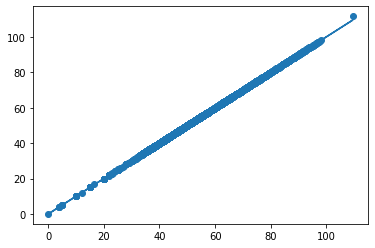

In [63]:
plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test)

In [ ]:
# build a few more models and pick the best 
# build perhaps neural networks or another model that would take into account sequences and use it without the biological features. 